In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!pip install imblearn

In [2]:
creditCardData = pd.read_excel('data/default of credit card clients.xls')
creditCardData.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
creditCardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
creditCardData.shape

(30000, 25)

In [4]:
print(creditCardData['SEX'].unique())
print(creditCardData['EDUCATION'].unique())
print(creditCardData['MARRIAGE'].unique())
print(creditCardData['AGE'].unique())
print(creditCardData['PAY_0'].unique())
print(creditCardData['PAY_2'].unique())
print(creditCardData['PAY_3'].unique())
print(creditCardData['PAY_4'].unique())
print(creditCardData['PAY_5'].unique())
print(creditCardData['PAY_6'].unique())


[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31 46
 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70 72 64
 65 71 69 68 79 74]
[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0 -1  2  3  5  4  7  8  6]
[-2  2  0 -1  3  6  4  7  8  5]


In [8]:
#print(creditCardData['PAY_6'])
#print(creditCardData.groupby('PAY_0')['ID'].nunique())
#print(creditCardData.groupby('PAY_2')['ID'].nunique())
#print(creditCardData.groupby('PAY_3')['ID'].nunique())
#print(creditCardData.groupby('PAY_4')['ID'].nunique())
#print(creditCardData.groupby('PAY_5')['ID'].nunique())
#print(creditCardData.groupby('PAY_6')['ID'].nunique())

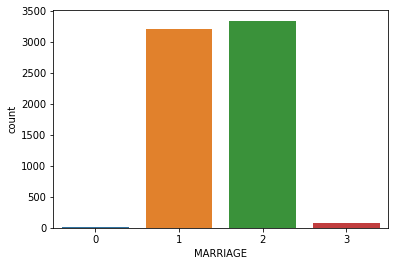

In [6]:
sns.countplot(creditCardData[creditCardData['default payment next month'] == 1]['MARRIAGE'])

In [5]:
creditCardData['EDUCATION'].replace([0,5,6], 4,inplace=True)

In [6]:
creditCardData['MARRIAGE'].replace(0, 3,inplace=True)

In [12]:
#creditCardData['Ratio1'] = creditCardData['PAY_AMT1']/creditCardData['BILL_AMT1']
#creditCardData['Ratio2'] = creditCardData['PAY_AMT2']/creditCardData['BILL_AMT2']
#creditCardData['Ratio3'] = creditCardData['PAY_AMT3']/creditCardData['BILL_AMT3']
#creditCardData['Ratio4'] = creditCardData['PAY_AMT4']/creditCardData['BILL_AMT4']
#creditCardData['Ratio5'] = creditCardData['PAY_AMT5']/creditCardData['BILL_AMT5']
#creditCardData['Ratio6'] = creditCardData['PAY_AMT6']/creditCardData['BILL_AMT6']

In [13]:
#creditCardData['Ratio1'].fillna(1,inplace=True)
#creditCardData['Ratio2'].fillna(1,inplace=True)
#creditCardData['Ratio3'].fillna(1,inplace=True)
#creditCardData['Ratio4'].fillna(1,inplace=True)
#creditCardData['Ratio5'].fillna(1,inplace=True)
#creditCardData['Ratio6'].fillna(1,inplace=True)

In [14]:
#creditCardData.replace([np.inf, -np.inf], np.nan).fillna(1,inplace=True)

In [7]:
from sklearn import preprocessing

In [11]:
creditCardData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
billList = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payList = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in range(0,6):
    columnName = 'SUB'+str(i)
    creditCardData[columnName] = creditCardData[billList[i]] - creditCardData[payList[i]]

In [17]:
#total = creditCardData.isnull().sum(axis=0).sort_values(ascending=False)
#print(total)
creditCardData['SUB5'] = creditCardData['BILL_AMT6'] - creditCardData['PAY_AMT6']

In [19]:
creditCardData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SUB0,SUB1,SUB2,SUB3,SUB4,SUB5
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,3913,2413,689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,2682,725,1682,2272,3455,1261
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,27721,12527,12559,13331,13948,10549
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,44990,46214,48091,27214,27890,28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,6617,-31011,25835,11940,18457,18452


In [137]:
creditCardData_WithSUB = creditCardData.drop(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1)

In [61]:
creditCardData_WithSUB.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SUB0,SUB1,SUB2,SUB3,SUB4,SUB5,LIMIT_REMAINING
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,2413,689,0,0,0,12985
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,725,1682,2272,3455,1261,107923
2,3,90000,2,2,2,34,0,0,0,0,0,0,27721,12527,12559,13331,13948,10549,-635
3,4,50000,2,2,1,37,0,0,0,0,0,0,44990,46214,48091,27214,27890,28547,-172946
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,6617,-31011,25835,11940,18457,18452,-290


In [60]:
creditCardData_WithSUB['LIMIT_REMAINING'] = creditCardData_WithSUB['LIMIT_BAL'] - (creditCardData_WithSUB['SUB0'] + creditCardData_WithSUB['SUB1']+creditCardData_WithSUB['SUB2']+creditCardData_WithSUB['SUB3']+creditCardData_WithSUB['SUB4']+creditCardData_WithSUB['SUB5'])

In [23]:
creditCardDataOut = creditCardData_WithSUB.pop('default payment next month')

In [11]:
creditCardBackupData = creditCardData.copy()

In [18]:
#creditCardData.drop(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],inplace=True,axis=1)

In [12]:
creditCardData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [20]:
outputDataSet = creditCardData.pop('default payment next month')
outputDataSet.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [21]:
normalized_creditCardData = preprocessing.normalize(creditCardData)

# Plotting Histogram 

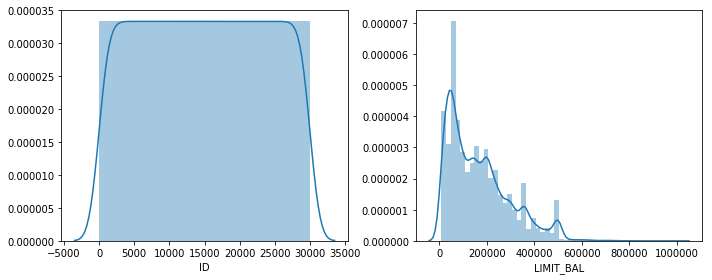

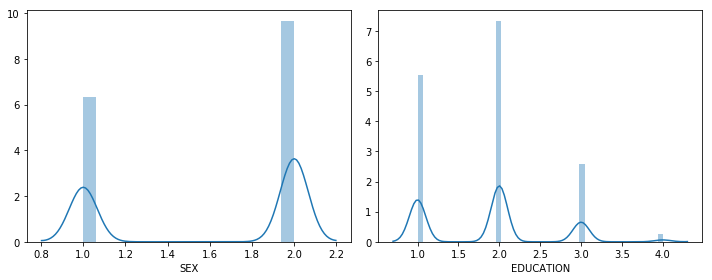

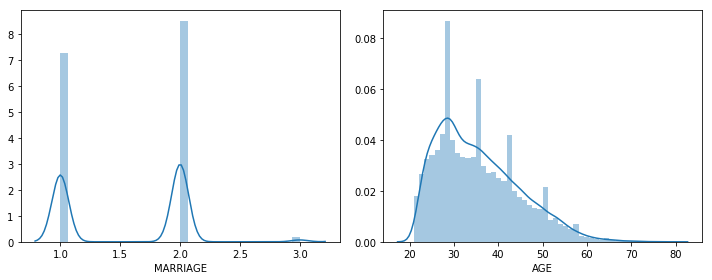

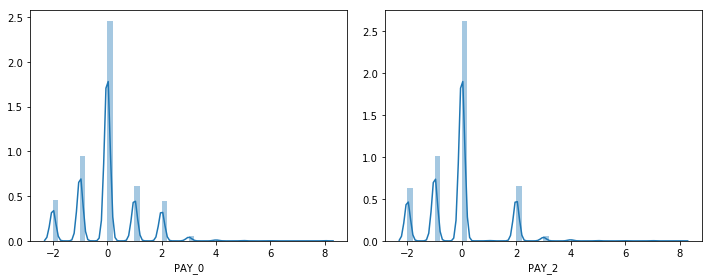

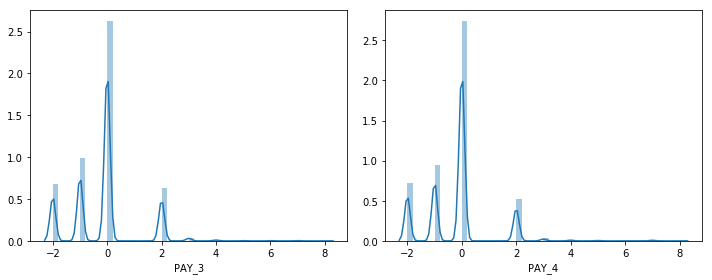

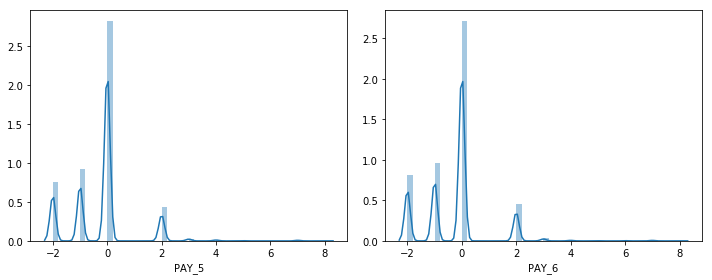

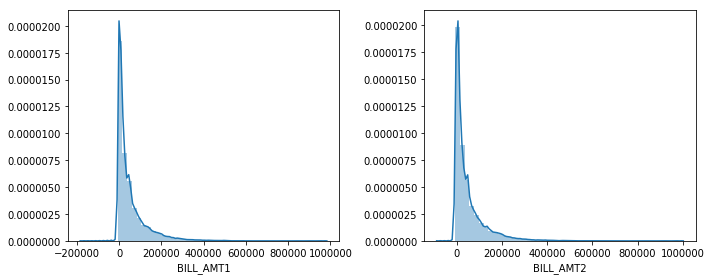

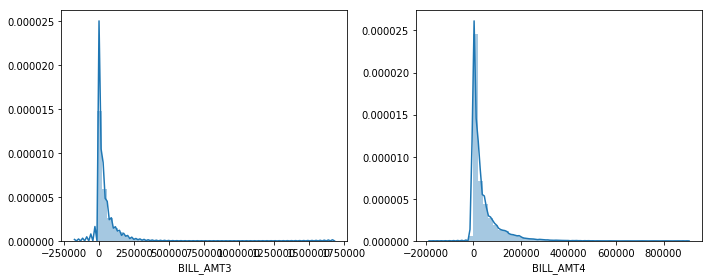

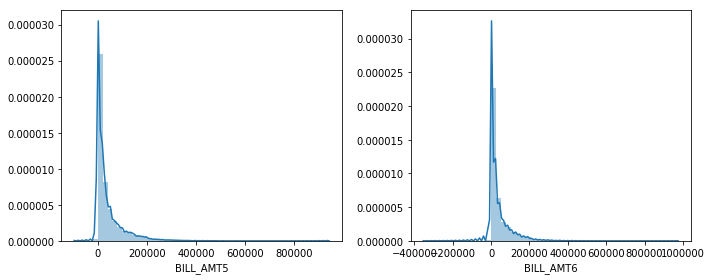

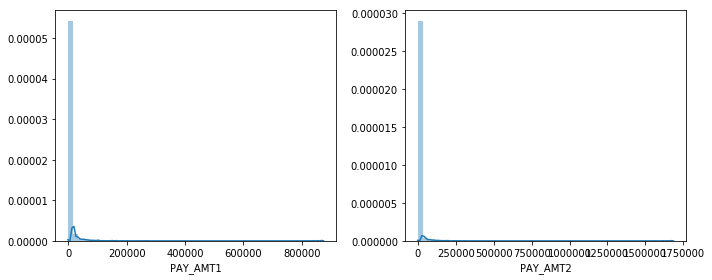

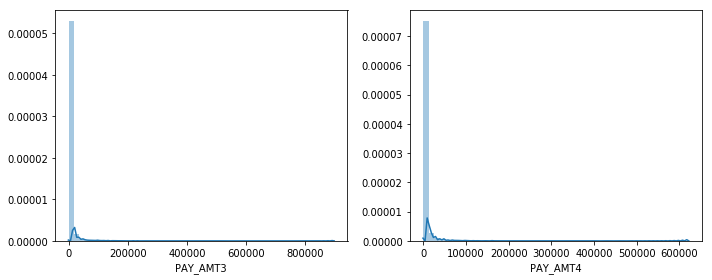

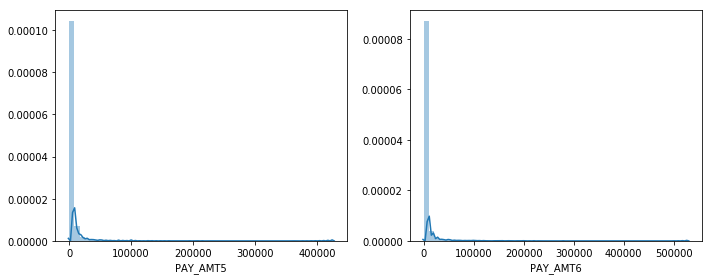

In [22]:
num_cols = creditCardData.columns
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(creditCardData[num_cols[i]], kde=True)
        plt.subplot(122)            
        sns.distplot(creditCardData[num_cols[i+1]], kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(creditCardData[num_cols[i]], kde=False)

In [14]:
#sns.pairplot(creditCardData)
creditCardData.drop('ID',axis=1,inplace=True)

In [22]:
normalized_creditCardData.shape

(30000, 22)

In [17]:
creditCardData.drop('AGE',axis=1,inplace=True)

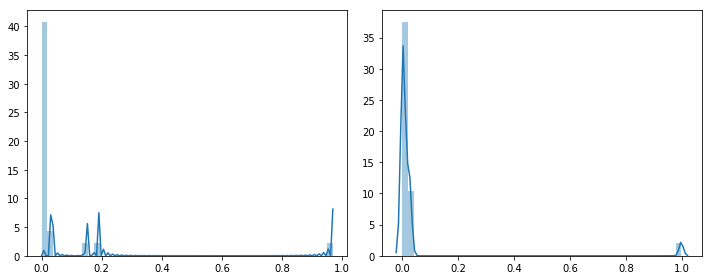

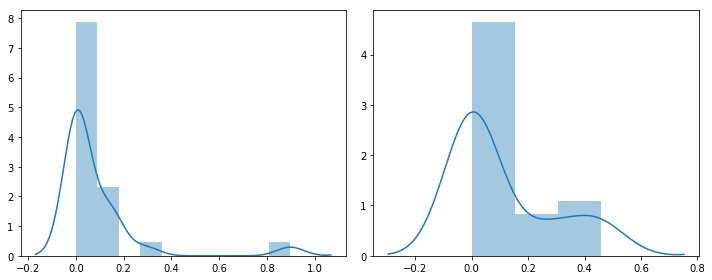

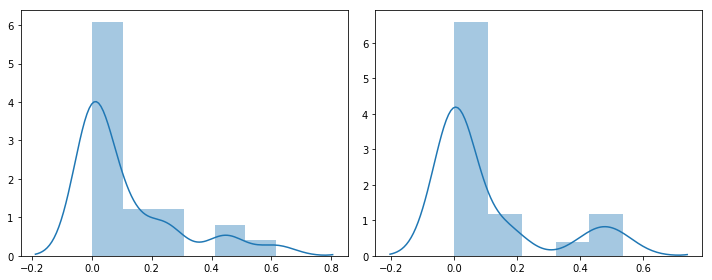

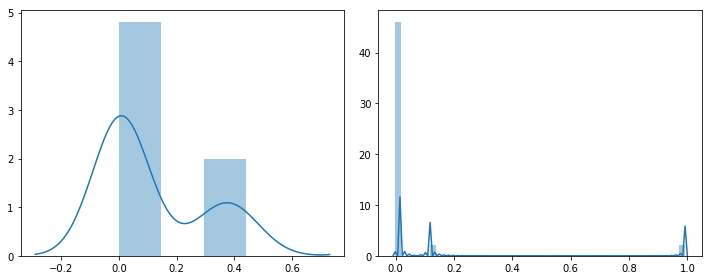

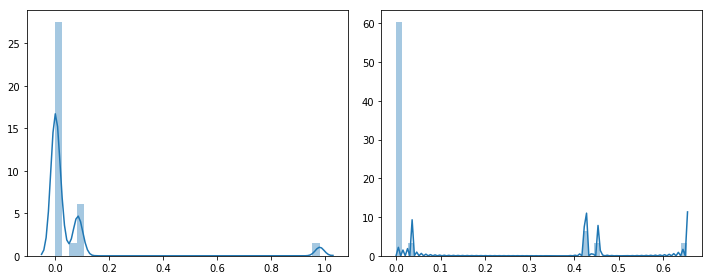

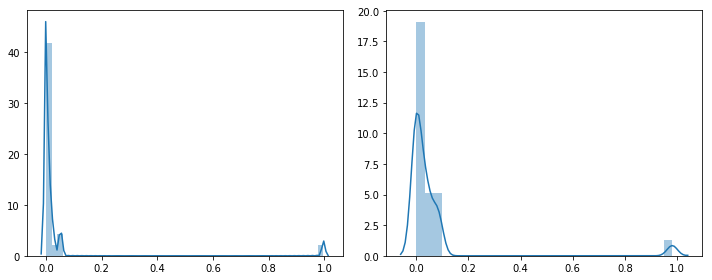

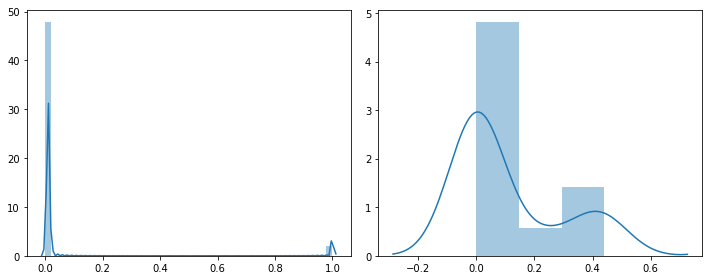

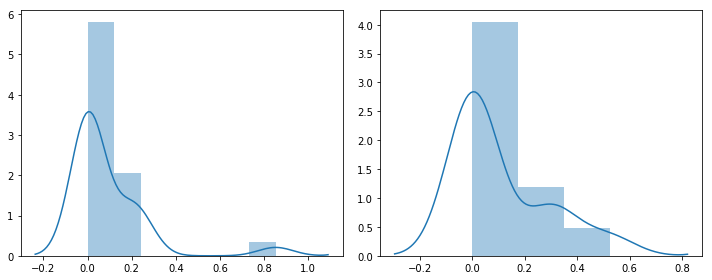

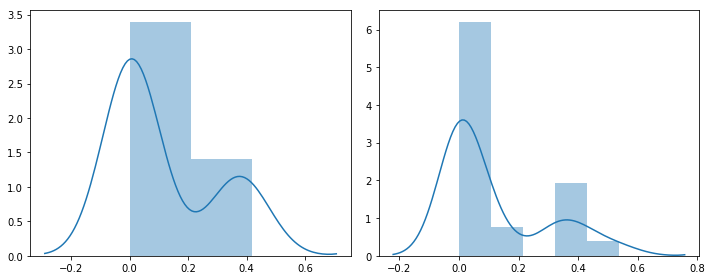

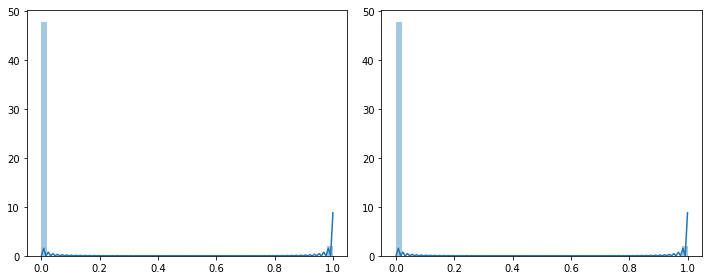

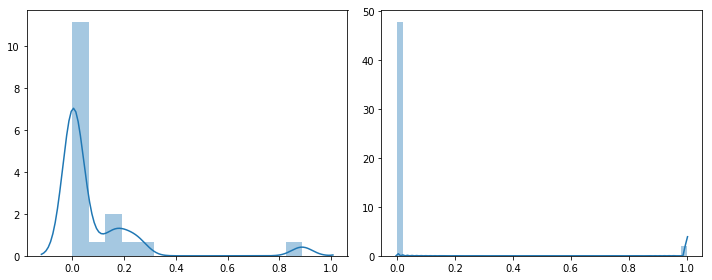

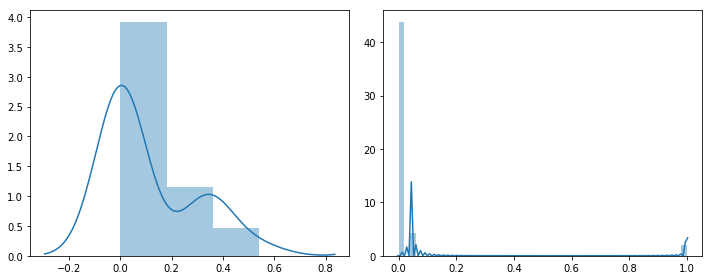

In [32]:
num_cols = normalized_creditCardData.shape[1]
for i in range(0,num_cols,2):
    if num_cols > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(normalized_creditCardData[i], kde=True)
        plt.subplot(122)            
        sns.distplot(normalized_creditCardData[i+1], kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(normalized_creditCardData[i], kde=False)

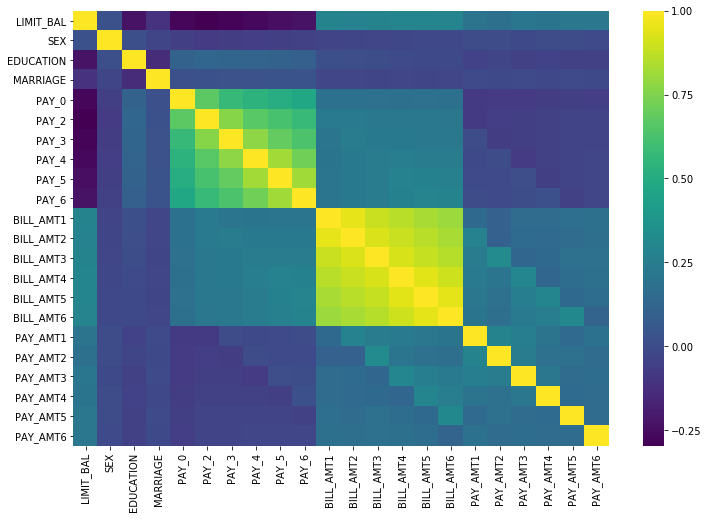

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(creditCardData.corr(), cmap='viridis')

#  Iteration 0

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [25]:
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(normalized_creditCardData, outputDataSet, test_size=0.3, random_state=0)

In [26]:
X_devtrain_N,X_DevTest_N,Y_devtrain_N,y_DevTest_N = train_test_split(X_train_N, y_train_N, test_size=0.3, random_state=0)

In [27]:
clf = LogisticRegression()
clf.fit(X_devtrain_N,Y_devtrain_N)
y_pred_N = clf.predict(X_DevTest_N)
accuracy_score(y_DevTest_N, y_pred_N)

0.77777777777777779

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_DevTest_N, y_pred_N))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4901
          1       0.00      0.00      0.00      1399

avg / total       0.61      0.78      0.68      6300



In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clfDecision = DecisionTreeClassifier()
clfDecision.fit(X_devtrain_N,Y_devtrain_N)
y_pred_N = clfDecision.predict(X_DevTest_N)
print(accuracy_score(y_DevTest_N, y_pred_N))
print(classification_report(y_DevTest_N, y_pred_N))

0.72380952381
             precision    recall  f1-score   support

          0       0.83      0.82      0.82      4901
          1       0.38      0.40      0.39      1399

avg / total       0.73      0.72      0.73      6300



In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_DevTest_N, y_pred_N)

0.608478321079023

In [32]:
X_train, X_test, y_train, y_test = train_test_split(creditCardData, outputDataSet, test_size=0.3, random_state=0)

In [33]:
X_devtrain,X_DevTest,Y_devtrain,y_DevTest = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [34]:
clf = LogisticRegression()
clf.fit(X_devtrain,Y_devtrain)
y_pred = clf.predict(X_DevTest)
accuracy_score(y_DevTest, y_pred)

0.77793650793650793

In [35]:
clfDecision = DecisionTreeClassifier()
clfDecision.fit(X_devtrain,Y_devtrain)
y_pred_D = clfDecision.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))


0.73126984127
             precision    recall  f1-score   support

          0       0.83      0.82      0.83      4901
          1       0.40      0.42      0.41      1399

avg / total       0.74      0.73      0.73      6300



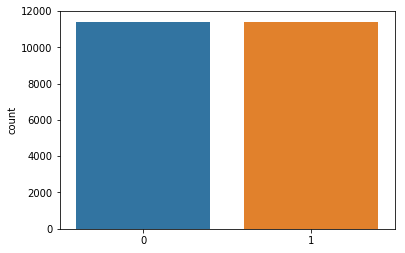

In [36]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=9)
X_DevOversample, y_DevOversample = ros.fit_sample(X_devtrain, Y_devtrain)
sns.countplot(y_DevOversample)

In [37]:
clf = LogisticRegression()
clf.fit(X_DevOversample,y_DevOversample)
y_pred = clf.predict(X_DevTest)
accuracy_score(y_DevTest, y_pred)

0.68999999999999995

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_DevTest, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.77      0.80      4901
          1       0.33      0.39      0.36      1399

avg / total       0.71      0.69      0.70      6300



In [39]:
clfDecision = DecisionTreeClassifier()
clfDecision.fit(X_DevOversample,y_DevOversample)
y_pred_D = clfDecision.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))

0.726984126984
             precision    recall  f1-score   support

          0       0.83      0.82      0.82      4901
          1       0.39      0.40      0.39      1399

avg / total       0.73      0.73      0.73      6300



# Iteration 1
### Undersampling

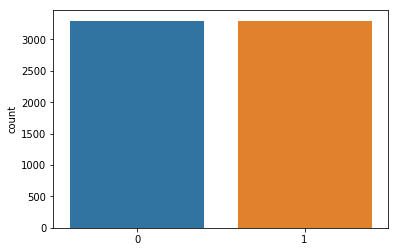

In [40]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=9)
X_DevUndersample, y_DevUndersample = ros.fit_sample(X_devtrain, Y_devtrain)
sns.countplot(y_DevUndersample)

In [41]:
clf1 = LogisticRegression()
clf1.fit(X_DevUndersample,y_DevUndersample)
y_pred1 = clf1.predict(X_DevTest)
accuracy_score(y_DevTest, y_pred1)

0.68587301587301586

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_DevTest, y_pred1))

             precision    recall  f1-score   support

          0       0.81      0.77      0.79      4901
          1       0.32      0.38      0.35      1399

avg / total       0.70      0.69      0.69      6300



In [43]:
clfDecision = DecisionTreeClassifier()
clfDecision.fit(X_DevUndersample,y_DevUndersample)
y_pred_D = clfDecision.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))

0.625079365079
             precision    recall  f1-score   support

          0       0.85      0.63      0.72      4901
          1       0.32      0.62      0.43      1399

avg / total       0.74      0.63      0.66      6300



# Iteration 3
### Tuning the models

In [32]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

In [33]:
# Defined a function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj

In [34]:
# Defined a function for implementing hyper parameter tuning
def gridfuncAUC(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(roc_auc_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj

In [35]:
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    mean_train_scores = grid_obj.cv_results_['mean_train_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in list(grid_obj.param_grid.items())[0][1]]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_train_scores, c='r', label='Train set')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g', label='Test set')
    plt.xlabel(list(grid_obj.param_grid.items())[0][1])
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [48]:
clfDecision = DecisionTreeClassifier(random_state=9)

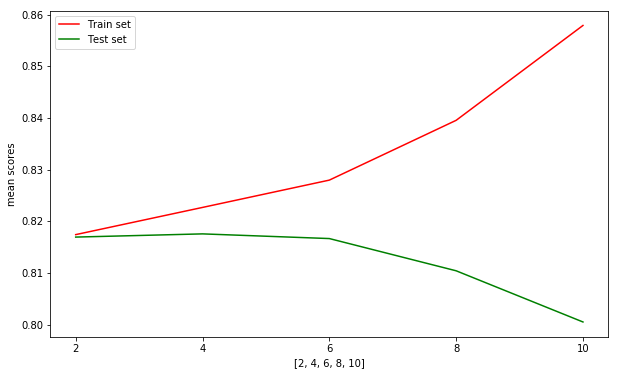

In [49]:
# plotting the graph to find the variation in model for given n_estimators 

grid = gridfunc(clfDecision, {'max_depth': [2,4,6,8,10]} , X_train, y_train)
hp_cv_scores(grid)

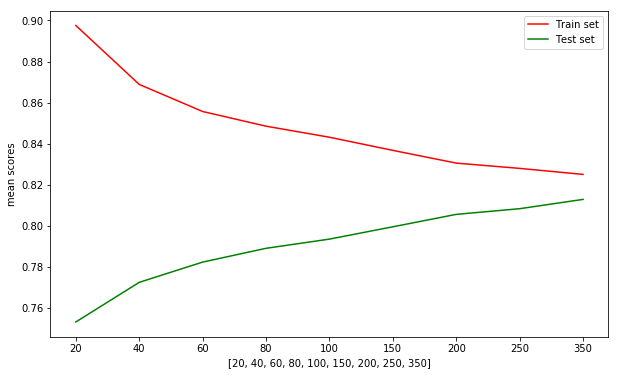

In [74]:
grid = gridfunc(clfDecision, {'min_samples_split': [20,40,60,80,100,150,200,250,350]} , X_train, y_train)
hp_cv_scores(grid)

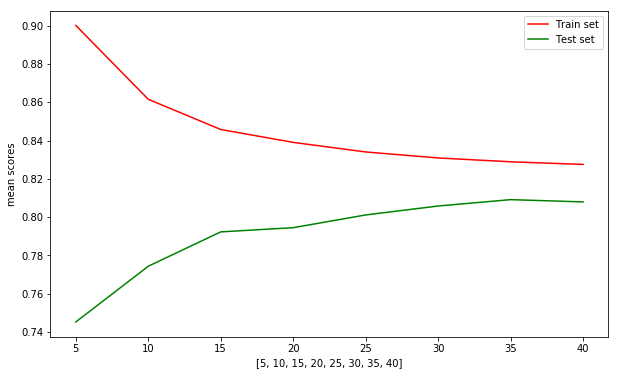

In [50]:
grid = gridfunc(clfDecision, {'min_samples_leaf': [5,10,15,20,25,30,35,40]} , X_train, y_train)
hp_cv_scores(grid)

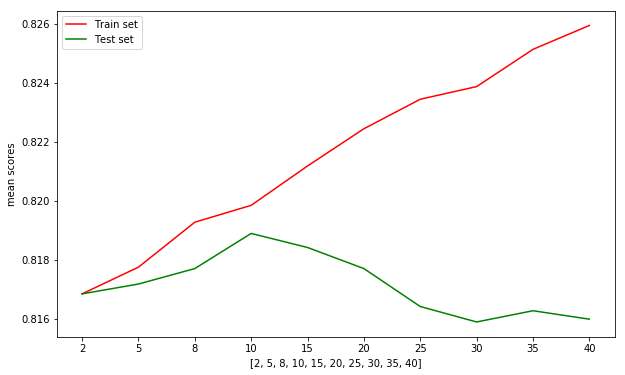

In [51]:
grid = gridfunc(clfDecision, {'max_leaf_nodes': [2,5,8,10,15,20,25,30,35,40]} , X_train, y_train)
hp_cv_scores(grid)

# Plot AUC Score

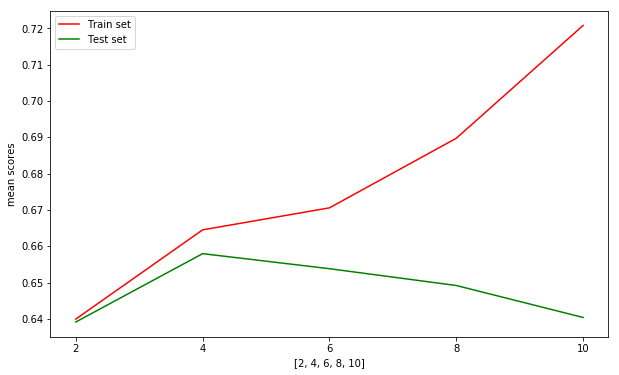

In [52]:
# plotting the graph to find the variation in model for given n_estimators 

grid = gridfuncAUC(clfDecision, {'max_depth': [2,4,6,8,10]} , X_train, y_train)
hp_cv_scores(grid)

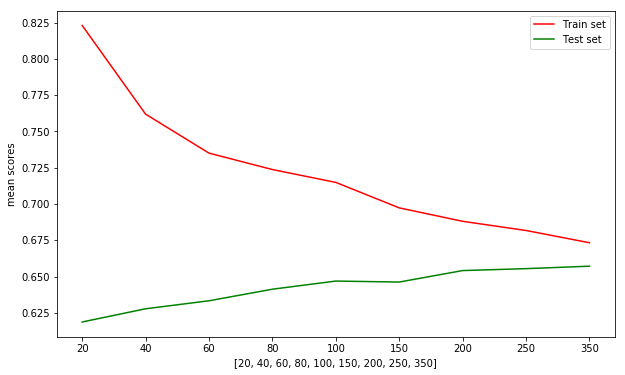

In [81]:
grid = gridfuncAUC(clfDecision, {'min_samples_split': [20,40,60,80,100,150,200,250,350]} , X_train, y_train)
hp_cv_scores(grid)

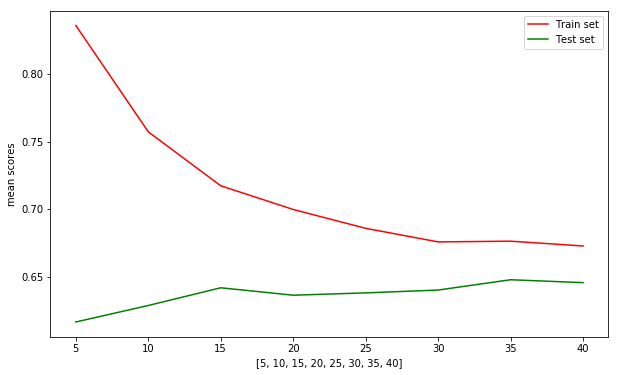

In [53]:
grid = gridfuncAUC(clfDecision, {'min_samples_leaf': [5,10,15,20,25,30,35,40]} , X_train, y_train)
hp_cv_scores(grid)

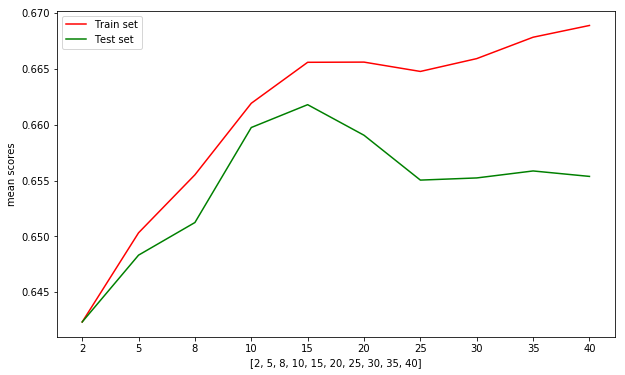

In [54]:
grid = gridfuncAUC(clfDecision, {'max_leaf_nodes': [2,5,8,10,15,20,25,30,35,40]} , X_train, y_train)
hp_cv_scores(grid)

In [97]:
clfFinalDecision = DecisionTreeClassifier()
parameter = {'max_depth': [2,4,6,8,10], 
              'min_samples_split': [20,40,60,80,100,150,200,250,350], 
              'min_samples_leaf': [5,10,15,20,25,30,35,40],
              'max_leaf_nodes': [2,5,8,10,15,20,25,30,35,40]
             }

In [ ]:
grid = gridfunc(clfFinalDecision, parameter, X_train, y_train)

In [57]:
clfDecision = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)
clfDecision.fit(X_DevUndersample,y_DevUndersample)
y_pred_D = clfDecision.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))

0.716349206349
             precision    recall  f1-score   support

          0       0.88      0.73      0.80      4901
          1       0.41      0.66      0.51      1399

avg / total       0.78      0.72      0.74      6300



In [58]:
clfDecision = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)
clfDecision.fit(X_DevOversample,y_DevOversample)
y_pred_D = clfDecision.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))

0.693015873016
             precision    recall  f1-score   support

          0       0.88      0.70      0.78      4901
          1       0.39      0.68      0.50      1399

avg / total       0.78      0.69      0.72      6300



# Random Forest 
### Testing parameters

In [59]:
classifier_RandomForest = RandomForestClassifier(random_state=9)

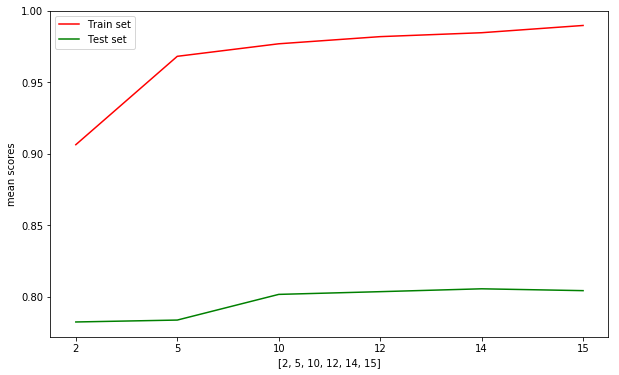

In [60]:
grid = gridfunc(classifier_RandomForest, {'n_estimators': [2, 5,10,12,14,15]} , X_train, y_train)
hp_cv_scores(grid)

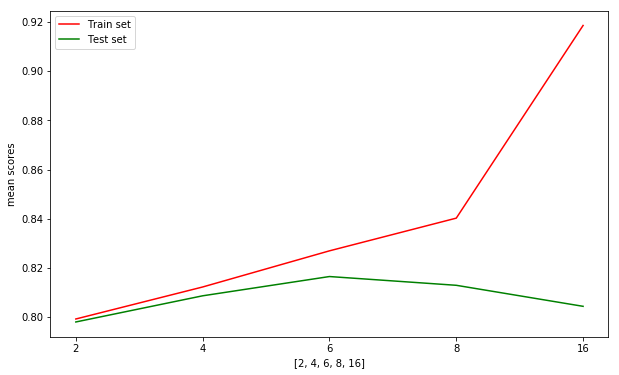

In [61]:
grid = gridfunc(classifier_RandomForest,{'max_depth': [2,4,6,8,16]} , X_train, y_train)
hp_cv_scores(grid)

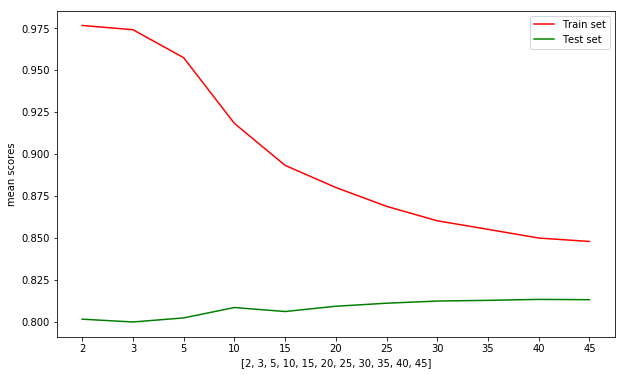

In [62]:
grid = gridfunc(classifier_RandomForest,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35,40,45]} , X_train, y_train)
hp_cv_scores(grid)

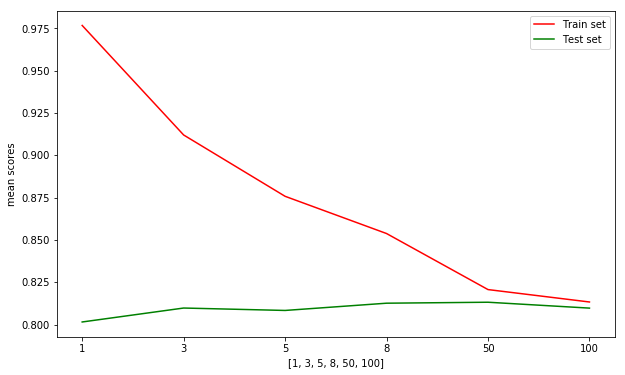

In [63]:
grid = gridfunc(classifier_RandomForest,{'min_samples_leaf': [1,3,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

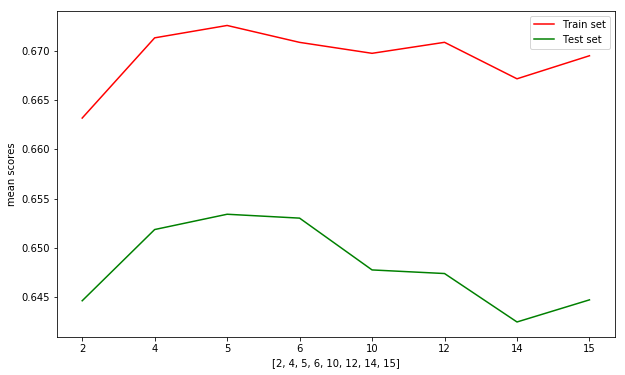

In [75]:
grid = gridfuncAUC(classifier_RandomForest, {'n_estimators': [2, 4,5,6,10,12,14,15]} , X_train, y_train)
hp_cv_scores(grid)

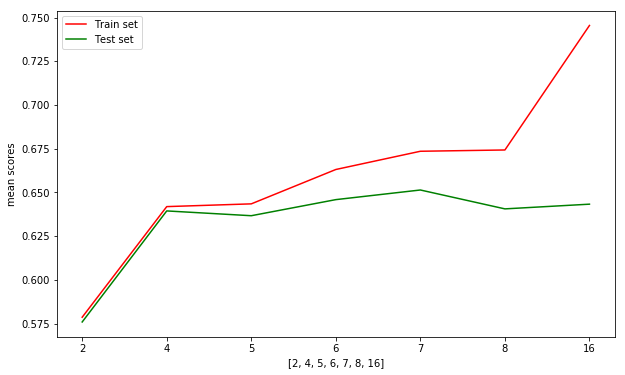

In [70]:
grid = gridfuncAUC(classifier_RandomForest,{'max_depth': [2,4,5,6,7,8,16]} , X_train, y_train)
hp_cv_scores(grid)

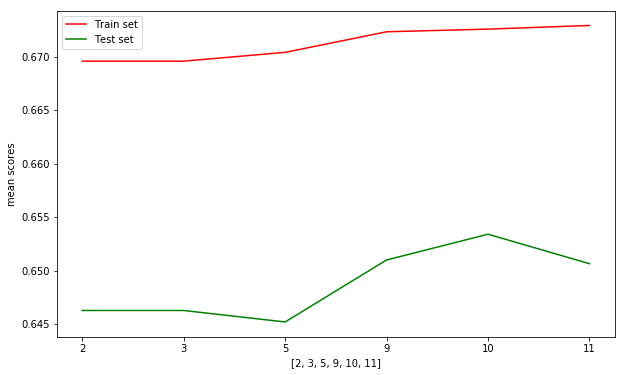

In [74]:
grid = gridfuncAUC(classifier_RandomForest,{'min_samples_split': [2, 3, 5,9, 10,11]} , X_train, y_train)
hp_cv_scores(grid)

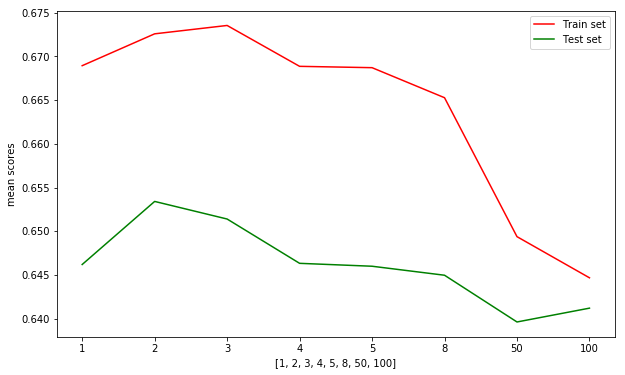

In [72]:
grid = gridfuncAUC(classifier_RandomForest,{'min_samples_leaf': [1,2,3,4,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

In [73]:
classifier_RandomForest = RandomForestClassifier(n_estimators=5,max_depth=7,min_samples_split=10,min_samples_leaf=2, random_state=9)
classifier_RandomForest.fit(X_DevOversample,y_DevOversample)
y_pred_D = classifier_RandomForest.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))

0.756507936508
             precision    recall  f1-score   support

          0       0.88      0.80      0.84      4901
          1       0.46      0.62      0.53      1399

avg / total       0.79      0.76      0.77      6300



In [89]:
classifier_RandomForest = RandomForestClassifier(n_estimators=5,max_depth=7,min_samples_split=10,min_samples_leaf=2,random_state=9)
classifier_RandomForest.fit(X_DevUndersample,y_DevUndersample)
y_pred_D = classifier_RandomForest.predict(X_DevTest)
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))

0.75619047619
             precision    recall  f1-score   support

          0       0.88      0.80      0.84      4901
          1       0.46      0.62      0.53      1399

avg / total       0.79      0.76      0.77      6300



# Ensemble Methods

In [103]:
# Hard Voting
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
decision_clf1 = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)
decision_clf2 = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)
decision_clf3 = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)
decision_clf4 = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)
decision_clf5 = DecisionTreeClassifier(max_depth=4,min_samples_split=200,min_samples_leaf=35,max_leaf_nodes=15)

voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2),
                                                ('Decision Tree 3', decision_clf3),
                                                ('Decision Tree 4', decision_clf4),
                                                ('Decision Tree 5', decision_clf5)],
                                   voting = 'hard')

voting_clf_hard.fit(X_DevUndersample,y_DevUndersample)
y_pred_hard = voting_clf_hard.predict(X_DevTest)
accuracy_hard = accuracy_score(y_DevTest, y_pred_hard)
print(accuracy_hard)
print(classification_report(y_DevTest, y_pred_hard))

0.716349206349
             precision    recall  f1-score   support

          0       0.88      0.73      0.80      4901
          1       0.41      0.66      0.51      1399

avg / total       0.78      0.72      0.74      6300



In [104]:
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2),
                                                ('Decision Tree 3', decision_clf3),
                                                ('Decision Tree 4', decision_clf4),
                                                ('Decision Tree 5', decision_clf5)],
                                   voting = 'hard')

voting_clf_hard.fit(X_DevOversample,y_DevOversample)
y_pred_hard = voting_clf_hard.predict(X_DevTest)
accuracy_hard = accuracy_score(y_DevTest, y_pred_hard)
print(accuracy_hard)
print(classification_report(y_DevTest, y_pred_hard))

0.693015873016
             precision    recall  f1-score   support

          0       0.88      0.70      0.78      4901
          1       0.39      0.68      0.50      1399

avg / total       0.78      0.69      0.72      6300



In [107]:
# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2),
                                                ('Decision Tree 3', decision_clf3),
                                                ('Decision Tree 4', decision_clf4),
                                                ('Decision Tree 5', decision_clf5)],
                                   voting = 'soft')
voting_clf_soft.fit(X_DevUndersample,y_DevUndersample)
y_pred_soft = voting_clf_soft.predict(X_DevTest)

accuracy_soft = accuracy_score(y_DevTest, y_pred_soft)
print(accuracy_soft)
print(classification_report(y_DevTest, y_pred_soft))

0.727142857143
             precision    recall  f1-score   support

          0       0.88      0.75      0.81      4901
          1       0.43      0.65      0.51      1399

avg / total       0.78      0.73      0.74      6300



In [108]:
# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2),
                                                ('Decision Tree 3', decision_clf3),
                                                ('Decision Tree 4', decision_clf4),
                                                ('Decision Tree 5', decision_clf5)],
                                   voting = 'soft')
voting_clf_soft.fit(X_DevOversample,y_DevOversample)
y_pred_soft = voting_clf_soft.predict(X_DevTest)

accuracy_soft = accuracy_score(y_DevTest, y_pred_soft)
print(accuracy_soft)
print(classification_report(y_DevTest, y_pred_soft))

0.708571428571
             precision    recall  f1-score   support

          0       0.88      0.72      0.79      4901
          1       0.40      0.66      0.50      1399

avg / total       0.78      0.71      0.73      6300



## Adaboost

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=9)
ada_clf.fit(X_DevOversample,y_DevOversample)
y_pred_soft = ada_clf.predict(X_DevTest)

accuracy_ada = accuracy_score(y_DevTest, y_pred_soft)
print(accuracy_ada)
print(classification_report(y_DevTest, y_pred_soft))

0.740317460317
             precision    recall  f1-score   support

          0       0.88      0.77      0.82      4901
          1       0.44      0.62      0.52      1399

avg / total       0.78      0.74      0.75      6300



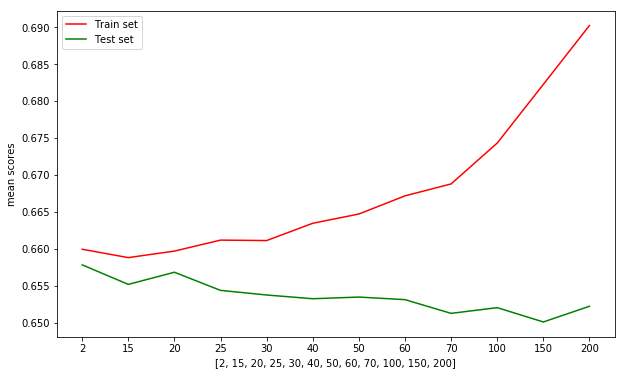

In [115]:
grid = gridfuncAUC(ada_clf, {'n_estimators': [2,15,20,25,30,40,50,60,70,100,150,200]} , X_train, y_train)
hp_cv_scores(grid)

# With Substituted values

In [138]:
creditCardDataOut.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [141]:
creditCardData_WithSUB.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,SUB0,SUB1,SUB2,SUB3,SUB4,SUB5
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,3913,2413,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,1,2682,725,1682,2272,3455,1261
2,90000,2,2,2,34,0,0,0,0,0,0,0,27721,12527,12559,13331,13948,10549
3,50000,2,2,1,37,0,0,0,0,0,0,0,44990,46214,48091,27214,27890,28547
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,6617,-31011,25835,11940,18457,18452


In [142]:
creditCardData_WithSUB.drop('default payment next month',axis=1,inplace=True)

In [143]:
from sklearn.cluster import KMeans
kMean_CLF = KMeans(n_clusters=2)
kMean_CLF.fit(creditCardData_WithSUB)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [144]:
kMean_CLF.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
creditCardData_WithSUB['Cluster'] = kMean_CLF.labels_

In [147]:
creditCardData_WithSUB.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SUB0,SUB1,SUB2,SUB3,SUB4,SUB5,Cluster
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,2413,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,725,1682,2272,3455,1261,0
2,90000,2,2,2,34,0,0,0,0,0,0,27721,12527,12559,13331,13948,10549,0
3,50000,2,2,1,37,0,0,0,0,0,0,44990,46214,48091,27214,27890,28547,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,6617,-31011,25835,11940,18457,18452,0


In [148]:
creditCardData_WithSUB.Cluster.value_counts()

0    25992
1     4008
Name: Cluster, dtype: int64

In [140]:
creditCardData_WithSUB.drop('ID',axis=1,inplace=True)

In [99]:
#creditCardData_WithSUBCopy = creditCardData_WithSUB.copy()

In [100]:
#creditCardData_WithSUB.drop('LIMIT_REMAINING',axis=1,inplace=True)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(creditCardData_WithSUB, creditCardDataOut, test_size=0.3, random_state=0)

In [150]:
X_devtrain,X_DevTest,Y_devtrain,y_DevTest = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

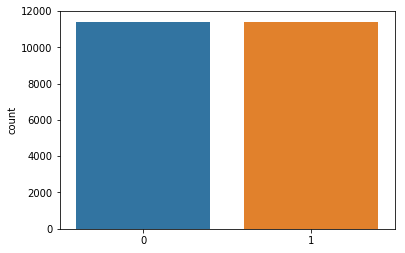

In [151]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=9)
X_DevOversample, y_DevOversample = ros.fit_sample(X_devtrain, Y_devtrain)
sns.countplot(y_DevOversample)

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [153]:
from sklearn.metrics import confusion_matrix

In [191]:
#for i in np.arange(1,10):
clfDecision = DecisionTreeClassifier(max_depth=8,min_samples_leaf=21,min_samples_split=40)
clfDecision.fit(X_DevOversample,y_DevOversample)
y_pred_D = clfDecision.predict(X_DevTest)
y_pred_Train = clfDecision.predict(X_DevOversample)
print(i)
print(accuracy_score(y_DevOversample, y_pred_Train))
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))
print(confusion_matrix(y_DevTest, y_pred_D))

0.9
0.732877312988
0.759206349206
             precision    recall  f1-score   support

          0       0.87      0.81      0.84      4901
          1       0.47      0.58      0.52      1399

avg / total       0.78      0.76      0.77      6300

[[3965  936]
 [ 581  818]]


In [192]:
print('Decision Tree ',roc_auc_score(y_DevTest, y_pred_D))

Decision Tree  0.696860963591


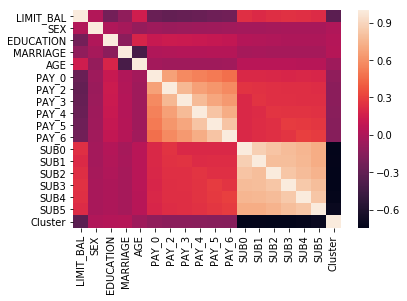

In [136]:
sns.heatmap(creditCardData_WithSUB.corr())

In [189]:
#for i in np.arange(6,12):
random_ForestClass = RandomForestClassifier(max_features=3,n_estimators=151,max_depth=9)
random_ForestClass.fit(X_DevOversample,y_DevOversample)
y_pred_D = random_ForestClass.predict(X_DevTest)
y_pred_Train = random_ForestClass.predict(X_DevOversample)
print(i)
print(accuracy_score(y_DevOversample, y_pred_Train))
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))
print(confusion_matrix(y_DevTest, y_pred_D))

0.9
0.761904761905
0.783968253968
             precision    recall  f1-score   support

          0       0.87      0.84      0.86      4901
          1       0.51      0.57      0.54      1399

avg / total       0.79      0.78      0.79      6300

[[4140  761]
 [ 600  799]]


In [190]:
print('Stacking Random FOrest ',roc_auc_score(y_DevTest, y_pred_D))

Stacking Random FOrest  0.707923898188


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [187]:
#for i in np.arange(0.1,1,0.1):
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                             n_estimators=121,
                             algorithm="SAMME.R", 
                             learning_rate=0.6)
ada_clf.fit(X_DevOversample,y_DevOversample)

y_pred_D = ada_clf.predict(X_DevTest)
y_pred_Train = ada_clf.predict(X_DevOversample)
print(i)
print(accuracy_score(y_DevOversample, y_pred_Train))
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))
print(confusion_matrix(y_DevTest, y_pred_D))

0.9
0.752258177673
0.751428571429
             precision    recall  f1-score   support

          0       0.88      0.79      0.83      4901
          1       0.46      0.62      0.53      1399

avg / total       0.79      0.75      0.76      6300

[[3863 1038]
 [ 528  871]]


In [188]:
print('Stacking ADA Boost ',roc_auc_score(y_DevTest, y_pred_D))

Stacking ADA Boost  0.705397025508


In [173]:
# Hard Voting
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [185]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                 n_estimators=121,
                                 algorithm="SAMME.R", 
                                 learning_rate=0.6)
random_ForestClass = RandomForestClassifier(max_features=3,n_estimators=151,max_depth=9)
clfDecision = DecisionTreeClassifier(max_depth=8,min_samples_leaf=21,min_samples_split=40)
voting_clf_hard = VotingClassifier(estimators = [('Ada Boost', ada_clf),
                                                 ('Random Forest', random_ForestClass),
                                                 ('Decision Tree', clfDecision)],
                                   voting = 'soft')
voting_clf_hard.fit(X_DevOversample,y_DevOversample)

y_pred_D = voting_clf_hard.predict(X_DevTest)
y_pred_Train = voting_clf_hard.predict(X_DevOversample)
print(i)
print(accuracy_score(y_DevOversample, y_pred_Train))
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))
print(confusion_matrix(y_DevTest, y_pred_D))

0.9
0.755020608612
0.775714285714
             precision    recall  f1-score   support

          0       0.88      0.83      0.85      4901
          1       0.50      0.59      0.54      1399

avg / total       0.79      0.78      0.78      6300

[[4062  839]
 [ 574  825]]


In [186]:
print('Stacking Soft Voting ',roc_auc_score(y_DevTest, y_pred_D))

Stacking Soft Voting  0.709258690186


In [179]:
#!pip install mlxtend

In [178]:
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [193]:
models = [ada_clf,random_ForestClass,clfDecision,clfDecision]

In [194]:
stacking_clf = StackingClassifier(classifiers = models,
                                 meta_classifier = clfDecision)
stacking_clf.fit(X_DevOversample,y_DevOversample)

y_pred_D = stacking_clf.predict(X_DevTest)
y_pred_Train = stacking_clf.predict(X_DevOversample)
print(i)
print(accuracy_score(y_DevOversample, y_pred_Train))
print(accuracy_score(y_DevTest, y_pred_D))
print(classification_report(y_DevTest, y_pred_D))
print(confusion_matrix(y_DevTest, y_pred_D))

0.9
0.764886433395
0.75380952381
             precision    recall  f1-score   support

          0       0.88      0.79      0.83      4901
          1       0.46      0.63      0.53      1399

avg / total       0.79      0.75      0.77      6300

[[3874 1027]
 [ 524  875]]


In [195]:
from sklearn.metrics import roc_auc_score
print('Stacking AUC ROC ',roc_auc_score(y_DevTest, y_pred_D))

Stacking AUC ROC  0.707948838029
